### Mapa de calor (heatmap)
Es una visualización que representa datos numéricos en una matriz usando colores para indicar la magnitud de los valores. Es especialmente útil para identificar patrones, tendencias y relaciones en datos tabulares o matriciales.

- Visualizar matrices de correlación
- Ver qué variables están fuertemente relacionadas (positiva o negativamente).
- Muy común en análisis exploratorio de datos (EDA).
- Mostrar intensidad o densidad de datos.

Cada celda representa una combinación de dos variables (una en filas, otra en columnas).
El color de la celda indica la magnitud del valor:

Suele incluir una barra de color (colorbar) para interpretar los valores.

##### Correlaciones de criptomonedas

/tmp/ipykernel_15020/2478340527.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  5 of 5 completed


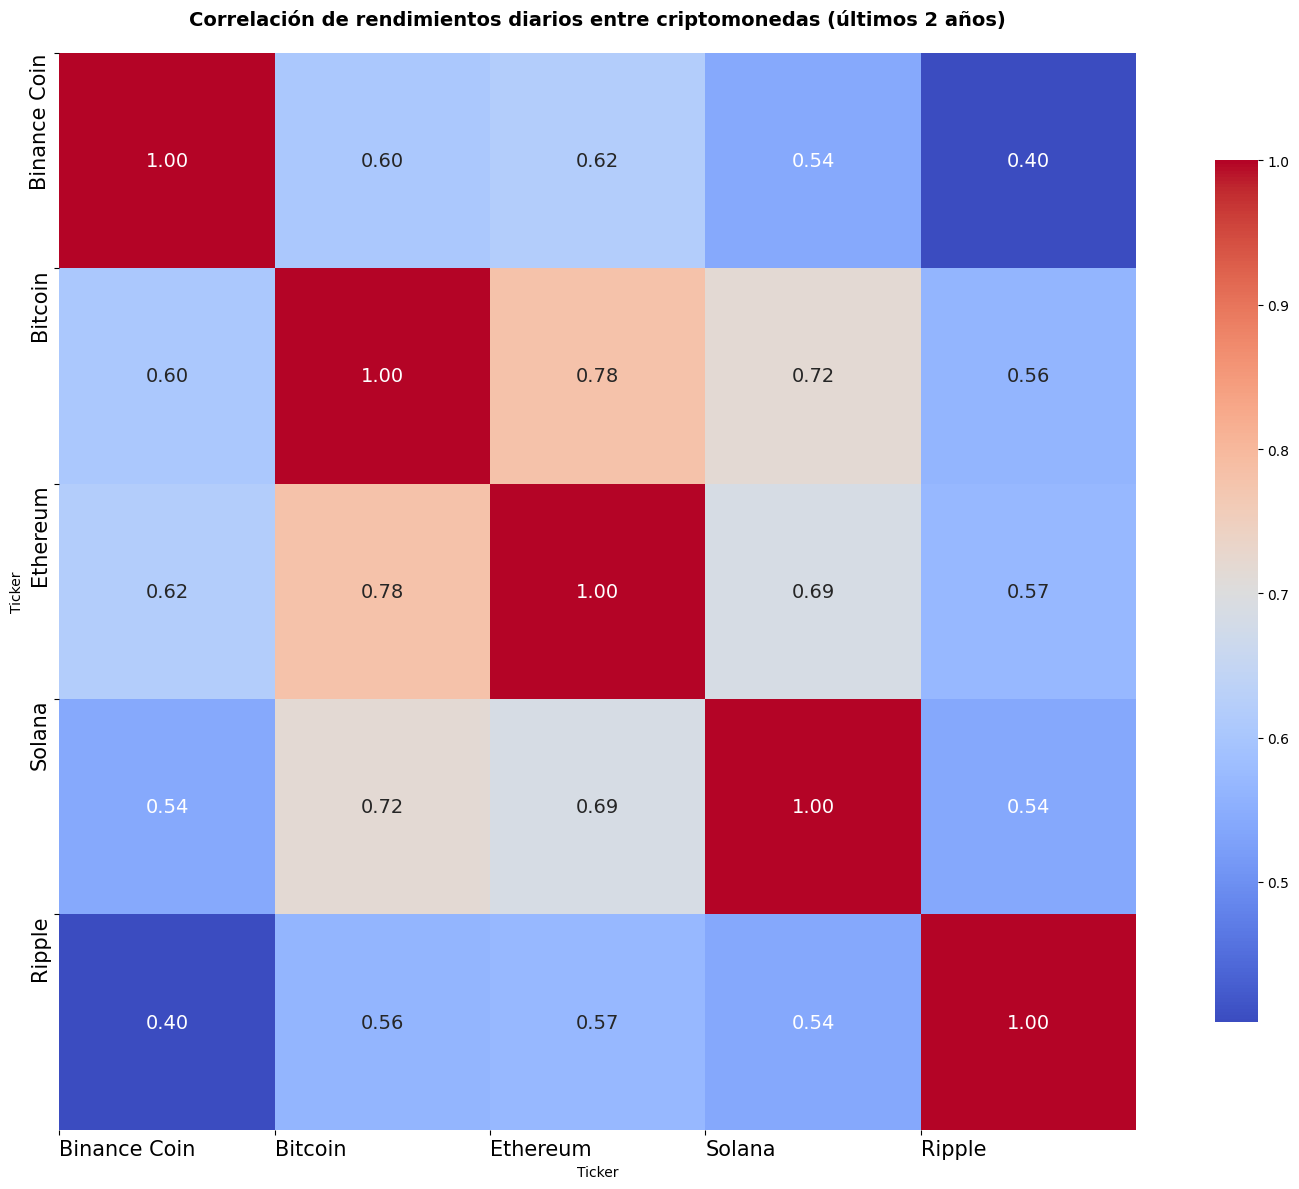

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

cryptos = {
    'BTC-USD': 'Bitcoin',
    'ETH-USD': 'Ethereum',
    'BNB-USD': 'Binance Coin',
    'SOL-USD': 'Solana',
    'XRP-USD': 'Ripple',
}

# Descargar datos históricos
data = yf.download(
    list(cryptos.keys()),
    period="2y",        # últimos 2 años
    interval="1d"       # datos diarios
)['Close']        

# Calcular rendimientos diarios. La correlación se hace sobre **rendimientos**, no precios.
returns = data.pct_change().dropna()

# Calcular matriz de correlación
corr_matrix = returns.corr()

plt.figure(figsize=(16, 12))

# Heatmap con Seaborn
sns.heatmap(
    corr_matrix,
    annot=True,                     # Mostrar valores
    fmt=".2f",                      # 2 decimales
    cmap="coolwarm",                # Rojo = alta correlación, azul = baja
    square=True,
    cbar_kws={"shrink": .8},
    annot_kws={"fontsize": 14},
)

# Personalizar etiquetas con nombres amigables
tick_labels = [cryptos.get(col, col) for col in corr_matrix.columns]
plt.xticks(ticks=range(len(tick_labels)), labels=tick_labels, ha='left', fontsize=15)
plt.yticks(ticks=range(len(tick_labels)), labels=tick_labels, va='top', fontsize=15)

plt.title("Correlación de rendimientos diarios entre criptomonedas (últimos 2 años)", fontsize=14, weight='bold', pad=20)
plt.tight_layout()
plt.show()